<a href="https://colab.research.google.com/github/amanksharma23/Hotel-Booking-Analysis/blob/main/Copy_of_Final_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

#Importing the required modules and connecting the file to be analyzed


In [2]:
#Importing the required modules 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Copy of Hotel Bookings.csv'
dataset=pd.read_csv(file_path)

# Getting the brief about the data to be analysed

In [5]:
dataset.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [6]:
dataset.tail(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119380,City Hotel,0,44,2017,August,35,31,1,3,2,...,No Deposit,9.0,NaN,0,Transient,140.75,0,1,Check-Out,2017-09-04
119381,City Hotel,0,188,2017,August,35,31,2,3,2,...,No Deposit,14.0,NaN,0,Transient,99.00,0,0,Check-Out,2017-09-05
119382,City Hotel,0,135,2017,August,35,30,2,4,3,...,No Deposit,7.0,NaN,0,Transient,209.00,0,0,Check-Out,2017-09-05
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,No Deposit,42.0,NaN,0,Transient,87.60,0,0,Check-Out,2017-09-06
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,2,Check-Out,2017-09-06
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [7]:
#Looking for the columns that are essential and not essential for analysing the data 
dataset.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [8]:
dataset.shape

(119390, 32)

#Finding out the null values 


1.   Replacing the null values with the 0 for the column agent and company.
2.   Replacing the null values of the column country with the mode.
3.   Replacing the null values of the column children with the mean.



In [9]:
dataset.isnull().sum().sort_values(ascending=False)[:10]

company                   112593
agent                      16340
country                      488
children                       4
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
hotel                          0
previous_cancellations         0
dtype: int64

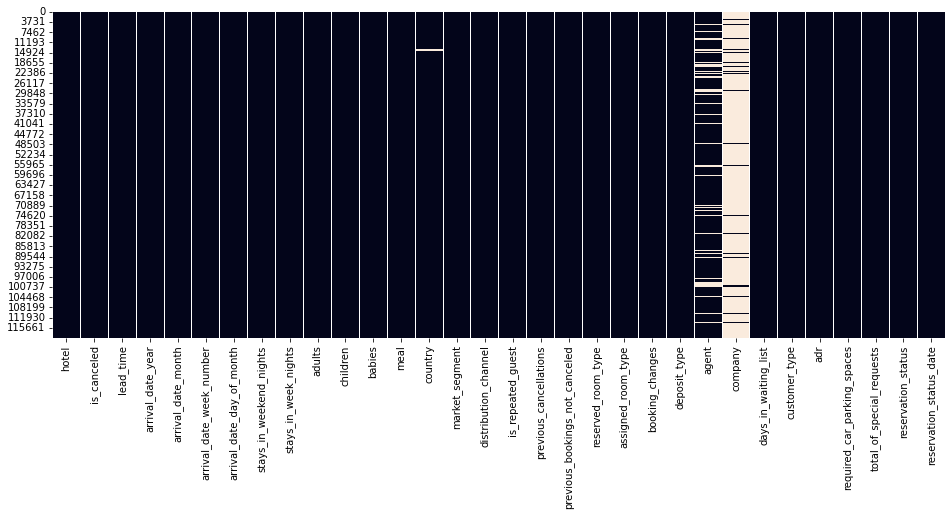

In [10]:
#We can clearly see that four are three columns which contain null values. 
#The columns that contains null values are 'company = 112593' , 'agent = 16340', 'country = 488' and 'children = '4'
plt.figure(figsize=(16,6))
sns.heatmap(dataset.isnull(), cbar=False)

In [11]:
#Replacing the null values as stated
dataset[['agent','company']] = dataset[['agent', 'company']].fillna(0.0)
dataset['country'].fillna(dataset.country.mode().to_string(), inplace=True)
dataset['children'].fillna(round(dataset.children.mean()), inplace=True)

In [12]:
dataset.isnull().sum().sort_values(ascending=False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

# Getting a brief statistial description about the numerical data present

In [13]:
dataset.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


#Getting the various data types and unique values present in the dataset.

*   Convertig the datatype of columns children, company and agent from float to integer.





In [14]:
dataset.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [15]:
dataset[['children', 'company', 'agent']] = dataset[['children', 'company', 'agent']].astype('int64')

In [16]:
dataset.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            178
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              334
company                            353
days_in_waiting_list     

##In the histogram below we can have a brief picture of various column trend as below.
1. We can see that the maximum guest came in the year 2016.
2. Maximum arrival week number is 30.
3. Maximum arrival happens in the last of the month.
4. Majority of the booking is cancelled.












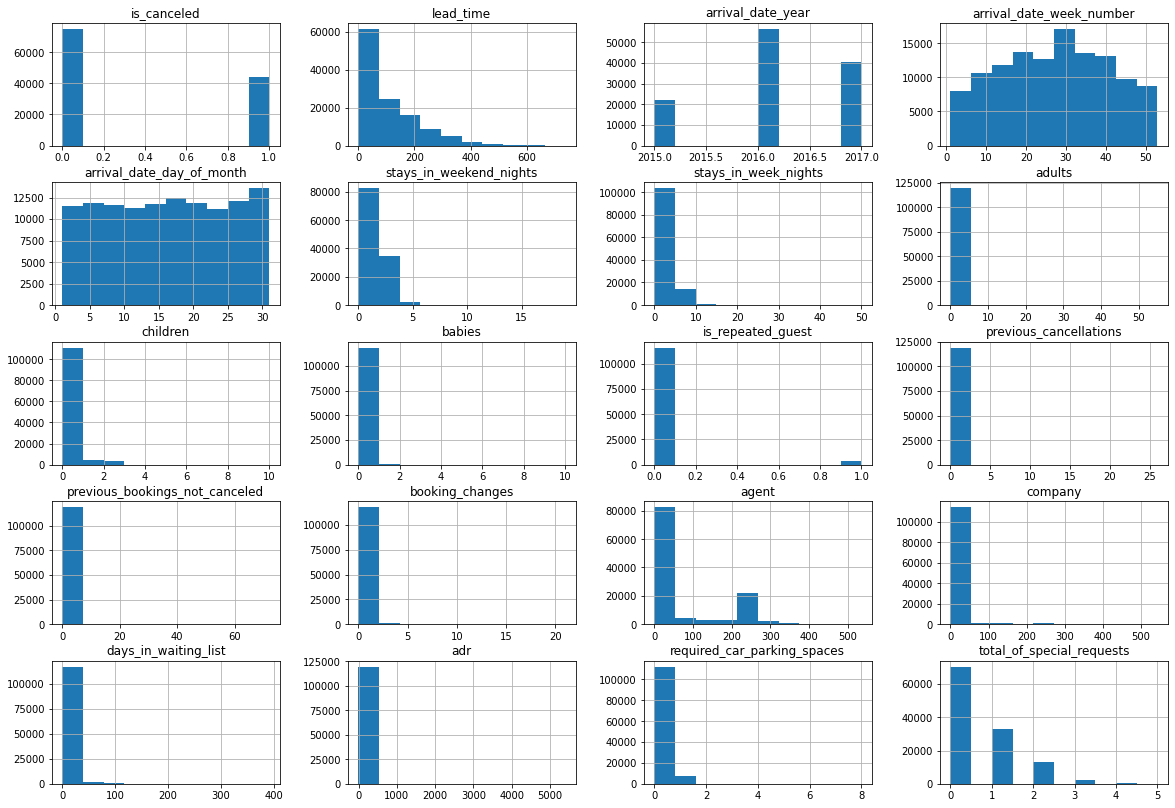

In [17]:
dataset.hist(figsize=(20,14))
plt.show()

# Correlation Analysis

In [18]:
correl = dataset.corr()
correl

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005036,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.046529,-0.082995,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037613,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.012640,-0.086250,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054636,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.056463,0.033882,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005515,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.018244,-0.032750,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014553,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.000202,0.003724,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045794,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.161427,-0.079977,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.195135,-0.043641,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030440,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,0.024994,-0.166778,-0.008283,0.230641,0.014785,0.122884
children,0.005036,-0.037613,0.054636,0.005515,0.014553,0.045794,0.044203,0.030440,1.000000,0.024030,-0.032858,-0.024729,-0.021072,0.048952,0.050581,-0.042622,-0.033271,0.324853,0.056255,0.081736
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.030266,-0.009459,-0.010621,0.029186,0.037383,0.097889


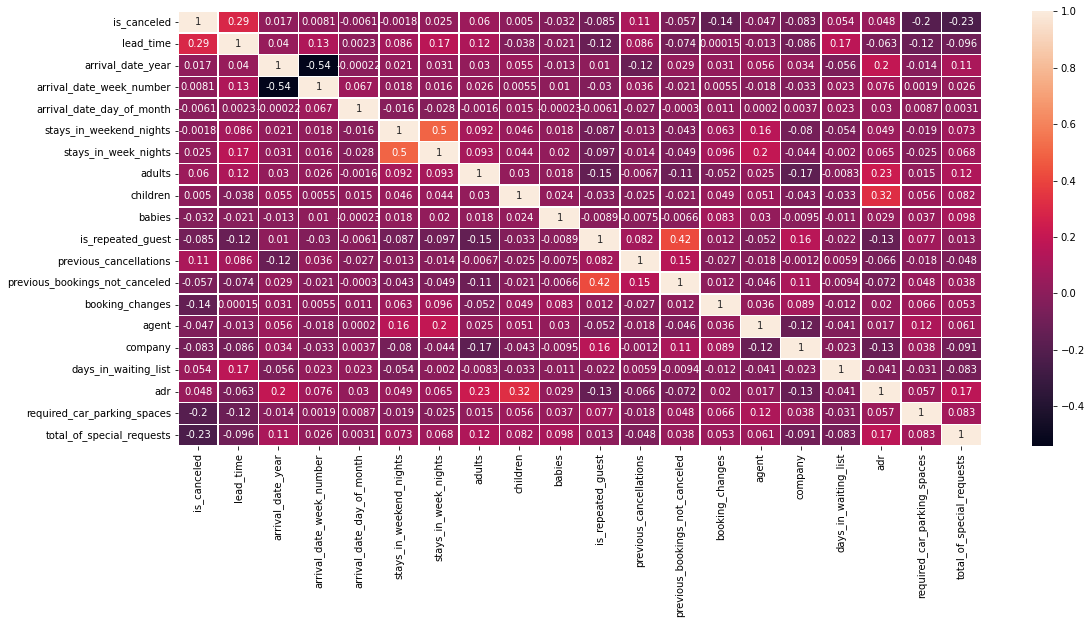

In [19]:
#Plotting the correlational heatmap using seaborn
plt.figure(figsize=(18,8))
sns.heatmap(correl, annot = True, linewidths = 0.5)

## **Inference**

### **There is no correlation between the variables except diagonal element. So we can deduce that variables are independent.**

# Analysing and visualisation of the dataset 

Year and Hotel wise bookings and cancellation distribution,

Text(0.5, 0, 'Hotel')

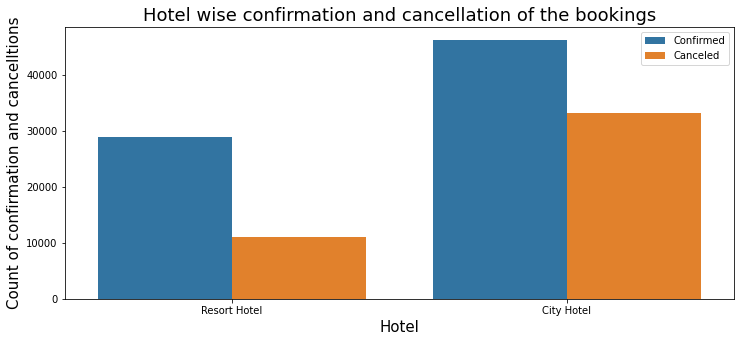

In [20]:
#Finding out the percentage and counts of confirmed and caceled bookings
#Plotting a Count Plot chart using seaborn for  counts of confirmed and caceled bookings
plt.figure(figsize=(12,5))
sns.countplot(x= 'hotel', hue='is_canceled',  data= dataset)
plt.legend(['Confirmed', 'Canceled'])
plt.title("Hotel wise confirmation and cancellation of the bookings", fontsize = 18)
plt.ylabel("Count of confirmation and cancelltions",fontsize = 15)
plt.xlabel("Hotel",fontsize = 15)

0    28938
1    11122
Name: is_canceled, dtype: int64

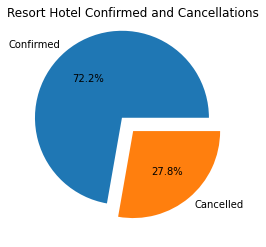

In [21]:
#Plotting a Pie chart using matplotlib for percentage of confirmed and caceled bookings of Resort Hotel
resort_hotel = dataset.loc[(dataset["hotel"] == "Resort Hotel")]
resort_hotel_checkin_cancel = resort_hotel['is_canceled'].value_counts()
mylabels = ["Confirmed", "Cancelled"]
myexplode = [0.2, 0]
resort_hotel_cancelation = plt.pie(resort_hotel_checkin_cancel, labels = mylabels, explode = myexplode, autopct='%1.1f%%',)
plt.title('Resort Hotel Confirmed and Cancellations')
resort_hotel_checkin_cancel

0    46228
1    33102
Name: is_canceled, dtype: int64

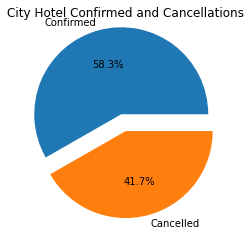

In [22]:
#Plotting a Pie chart using matplotlib for percentage of confirmed and caceled bookings of City Hotel
city_hotel = dataset.loc[(dataset["hotel"] == "City Hotel")]
city_hotel_checkin_cancel = city_hotel['is_canceled'].value_counts()
plt.pie(city_hotel_checkin_cancel, labels = mylabels, explode = myexplode, autopct='%1.1f%%')
plt.title('City Hotel Confirmed and Cancellations')
city_hotel_checkin_cancel

Inference,
We can clearly deduce from the the above graphs that the City hotel is having greater number of bookings as compared to Resort hotel. But, the cancellation percentage is high of the City hotel.

In [23]:
#Removing the cancelled bookings from the data and creating anew dataframe
data_not_canceled = dataset[dataset['is_canceled']==0]

Text(0.5, 0, 'Year')

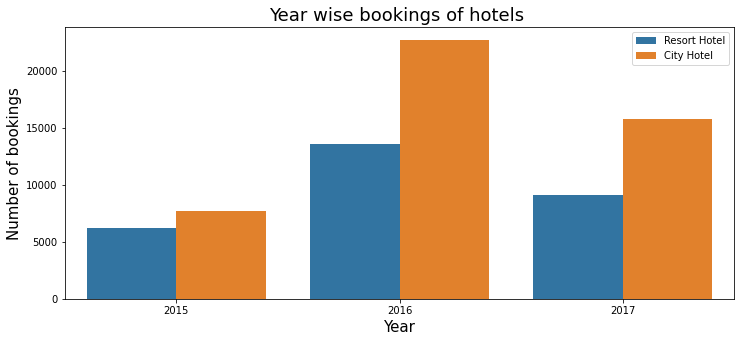

In [24]:
#Year wise Bookings of hotels  
plt.figure(figsize=(12,5))
sns.countplot(x= 'arrival_date_year', hue='hotel',  data= data_not_canceled)
plt.legend(['Resort Hotel', 'City Hotel'])
plt.title("Year wise bookings of hotels ", fontsize = 18)
plt.ylabel("Number of bookings",fontsize = 15)
plt.xlabel("Year",fontsize = 15)

Inference,
From the above graph it can be summarised that in the year 2016 both the hotel saw a massive increase in their bookings and by far the the year 2016 is the yera of the highest bookings of both hotel. In each year that is 2015, 2016 and 2017 the city hotel is having the highest number of bookings.

Text(0.5, 0, 'Year')

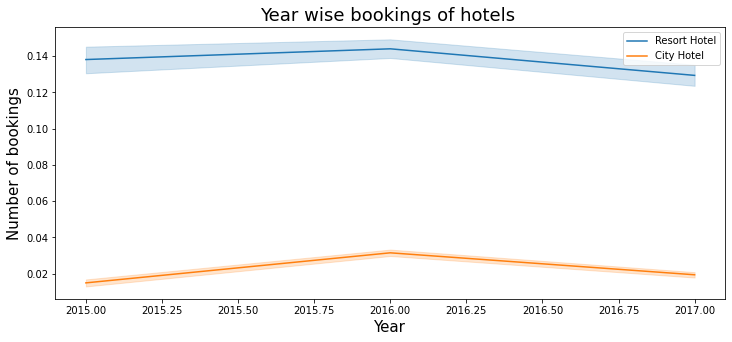

In [39]:
plt.figure(figsize=(12,5))
sns.lineplot(data=resort_hotel, x="arrival_date_year", y="required_car_parking_spaces")
sns.lineplot(data=city_hotel, x="arrival_date_year", y="required_car_parking_spaces")
plt.legend(['Resort Hotel', 'City Hotel'])
plt.title("Year wise bookings of hotels ", fontsize = 18)
plt.ylabel("Number of car parking spaces required",fontsize = 15)
plt.xlabel("Year",fontsize = 15)

In [53]:
Total_no_of_stays = data_not_canceled['stays_in_weekend_nights'] + data_not_canceled['stays_in_week_nights']

In [ ]:
data_not_canceled['no_of_stays'] = Total_no_of_stays

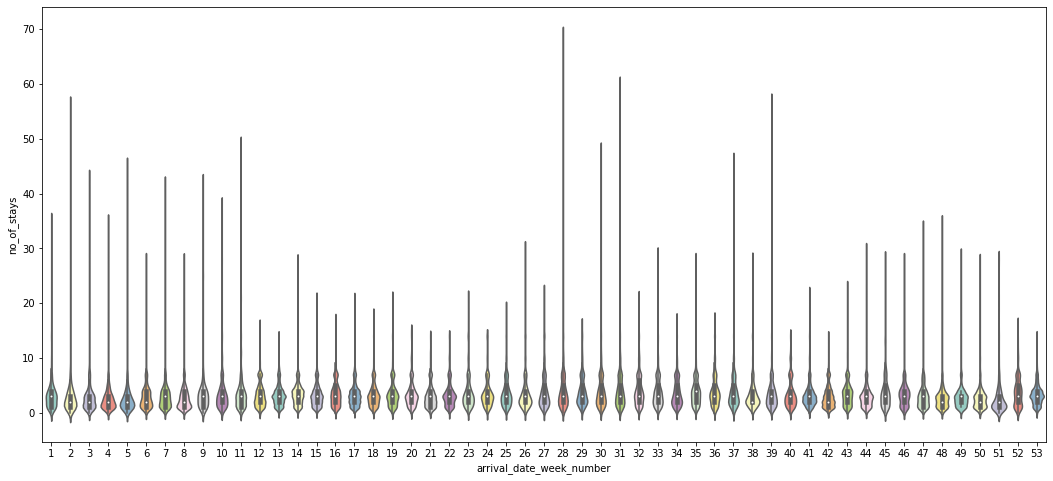

In [81]:
plt.figure(figsize =(18,8))
sns.violinplot(x="arrival_date_week_number", y="no_of_stays",palette="Set3", data=data_not_canceled)

Text(0.5, 0, 'Number of stays')

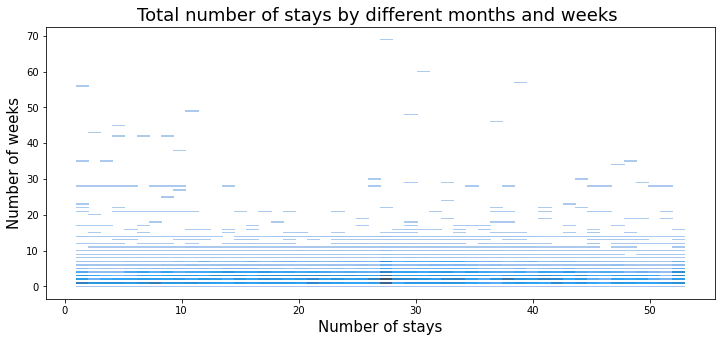

In [70]:
plt.figure(figsize=(12,5))
sns.histplot(x='arrival_date_week_number', y='no_of_stays', data=data_not_canceled, fit_reg=False, hue='arrival_date_month')
plt.title("Total number of stays by different months and weeks ", fontsize = 18)
plt.ylabel("Number of weeks",fontsize = 15)
plt.xlabel("Number of stays",fontsize = 15)

# CONCLUSION !

Now, we are down to the last part of this project that is concluding, So far we have analysed the various variables and on the basis of that we have visualised the data. We also treated the various null values accordingly and did the correlation analysis.** 
We took help from the various python documentation present and the various modules to analyze and visualise the data**. 